<h1 align = "center"><code>Internal Code</code> Exploratory Data Analysis</h1>

<br>
<div align = "justify">
<b>Exploratory Data Analysis (EDA)</b> on the data has been seperately studied and showcased. This piece of code is for <i>internal training and development</i> purposes only. Some EDA was done extensively previously, however when required will be done. LOREM LIPSUM DOLOR. #TODO Documentation.
</div>

In [2]:
import os   # miscellaneous os interfaces
import sys  # configuring python runtime environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style');

pd.set_option('display.max_rows', 50) # max. rows to show
pd.set_option('display.max_columns', 15) # max. cols to show
np.set_printoptions(precision = 3, threshold = 15) # set np options
pd.options.display.float_format = '{:,.3f}'.format # float precisions

In [3]:
sys.path.append(os.path.join("..", "utilities")) # append the `utilities` directory for additional helpful codes
from plotting import * # noqa: F403 # pylint: disable=unused-import

In [7]:
ROOT = ".." # the document root is one level up, that contains all code structure

In [6]:
market_snapshot = pd.read_pickle(os.path.join(ROOT, "data", "processed", "df_consolidated_2012-04-01_2022-12-31.pickle"))
market_snapshot.sample()

,EffectiveDate,year,month,day,BlockID,PurchaseBid,SellBid,MCV,MCP,scaled(MCP)
193791,2017-10-11,2017,10,11,64,"7,761.100","6,981.500","5,996.090","3,973.300",1.195


In [8]:
# create a monthly aggregated statistical summary sheet
monthly_statistics_ = market_snapshot.drop(columns = ["EffectiveDate", "day", "BlockID"]) \
    .groupby(by = ["year", "month"]) \
    .agg([
        "min",
        lambda x : np.quantile(x, 0.05),
        lambda x : np.quantile(x, 0.25),
        lambda x : np.quantile(x, 0.50),
        lambda x : np.quantile(x, 0.75),
        lambda x : np.quantile(x, 0.95),
        "max"
    ]) \
    .rename(columns = {
        "<lambda_0>" : "q05",
        "<lambda_1>" : "q25",
        "<lambda_2>" : "q50",
        "<lambda_3>" : "q75",
        "<lambda_4>" : "q95",
    })

monthly_statistics_.sample()

PurchaseBid                                                    \
                   min       q05       q25       q50       q75       q95   
year month                                                                 
2016 2       3,494.600 3,807.845 4,295.275 4,659.950 5,098.350 5,833.145   

                      ... scaled(MCP)                                      
                 max  ...         min   q05   q25   q50   q75   q95   max  
year month            ...                                                  
2016 2     6,833.400  ...       1.035 1.082 1.096 1.111 1.126 1.139 1.162  

[1 rows x 35 columns]

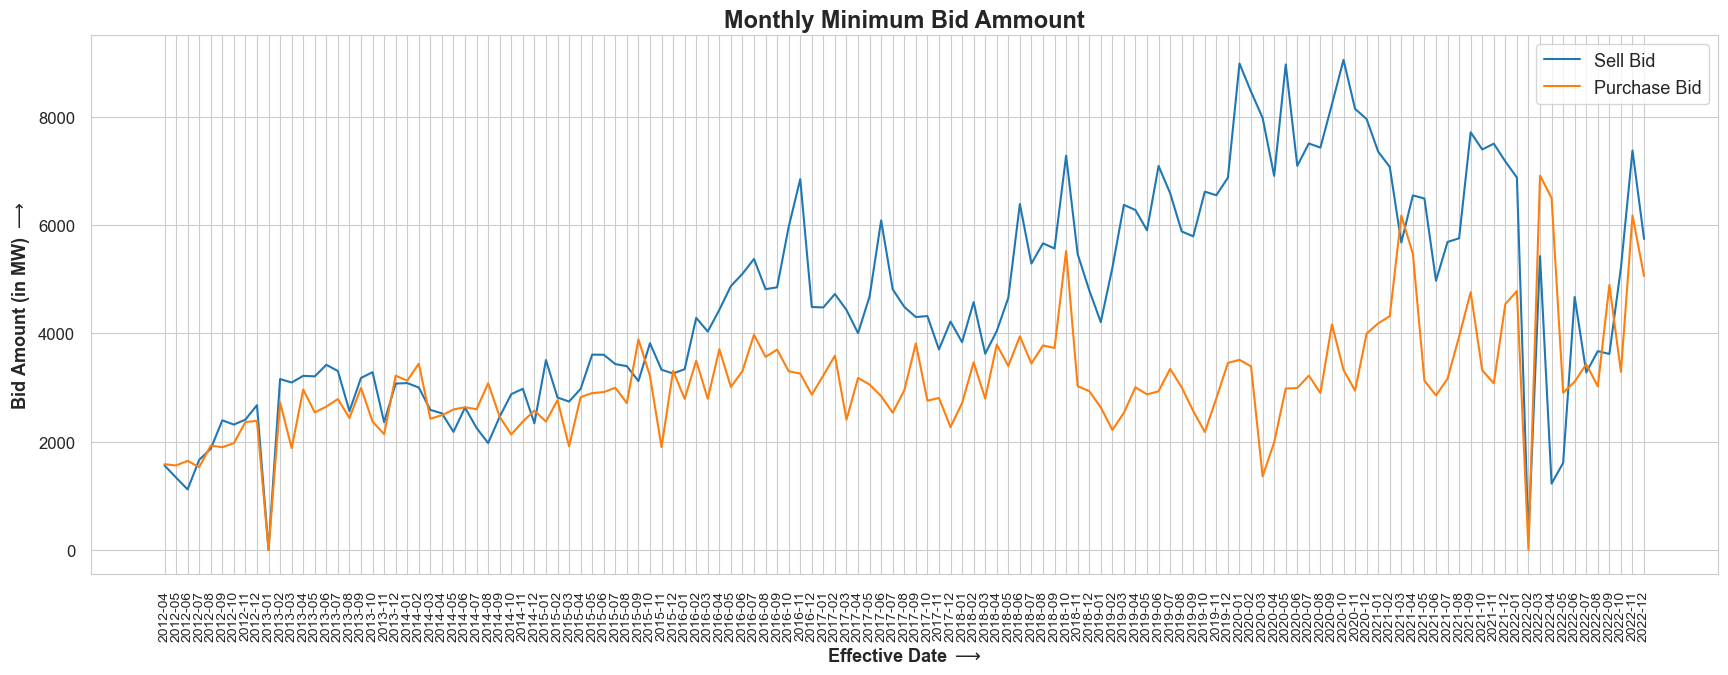

In [9]:
lineplot_1d(
    monthly_statistics_[[("SellBid", "min"), ("PurchaseBid", "min")]].values,
    xticks = list(map(lambda dt : f"{dt[0]}-{str(dt[1]).zfill(2)}", monthly_statistics_.index.values)),
    legends = ["Sell Bid", "Purchase Bid"],
    xlabel = "Effective Date $\longrightarrow$",
    ylabel = "Bid Amount (in MW) $\longrightarrow$",
    title = "Monthly Minimum Bid Ammount"
)

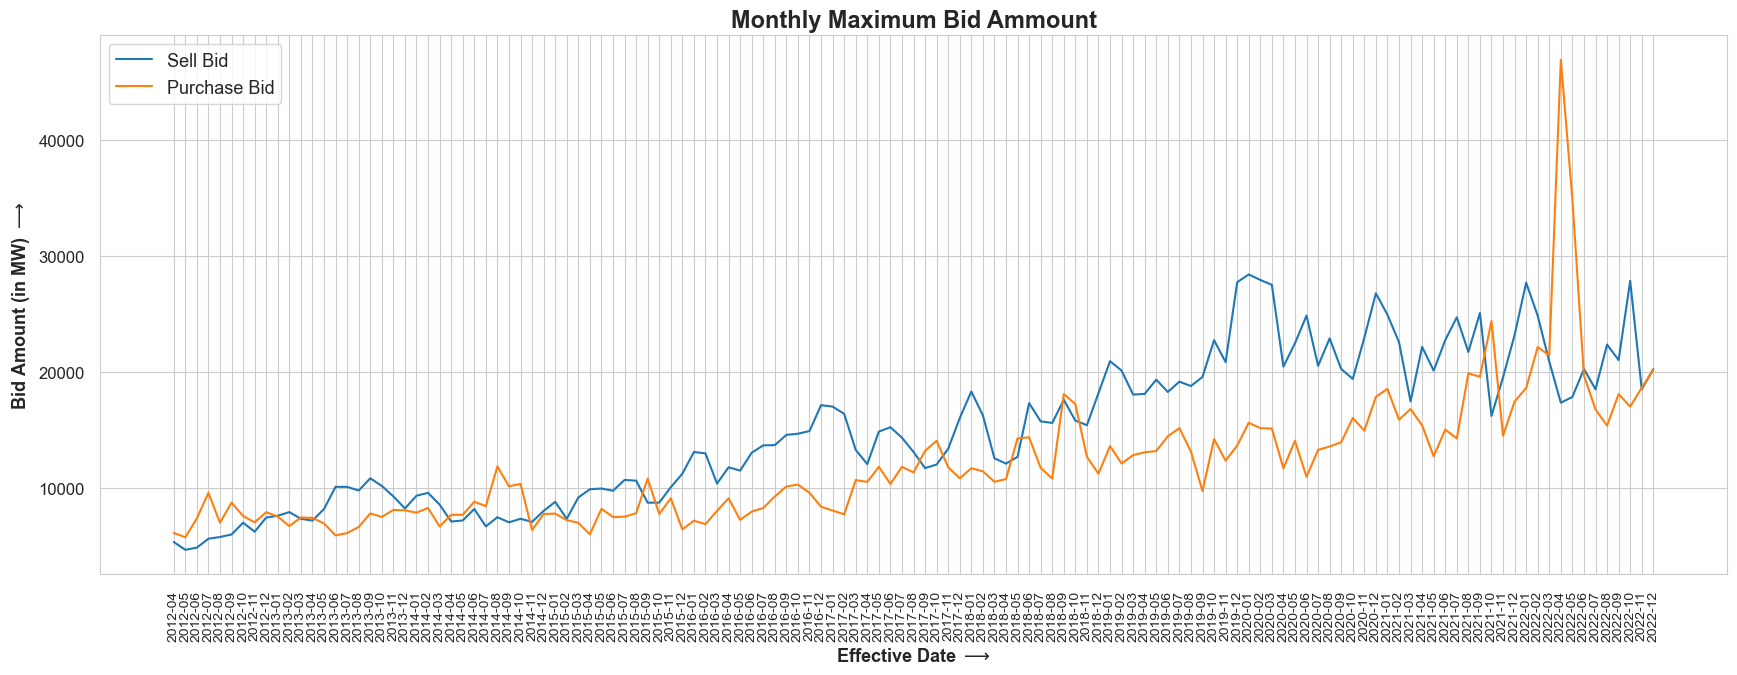

In [10]:
lineplot_1d(
    monthly_statistics_[[("SellBid", "max"), ("PurchaseBid", "max")]].values,
    xticks = list(map(lambda dt : f"{dt[0]}-{str(dt[1]).zfill(2)}", monthly_statistics_.index.values)),
    legends = ["Sell Bid", "Purchase Bid"],
    xlabel = "Effective Date $\longrightarrow$",
    ylabel = "Bid Amount (in MW) $\longrightarrow$",
    title = "Monthly Maximum Bid Ammount"
)

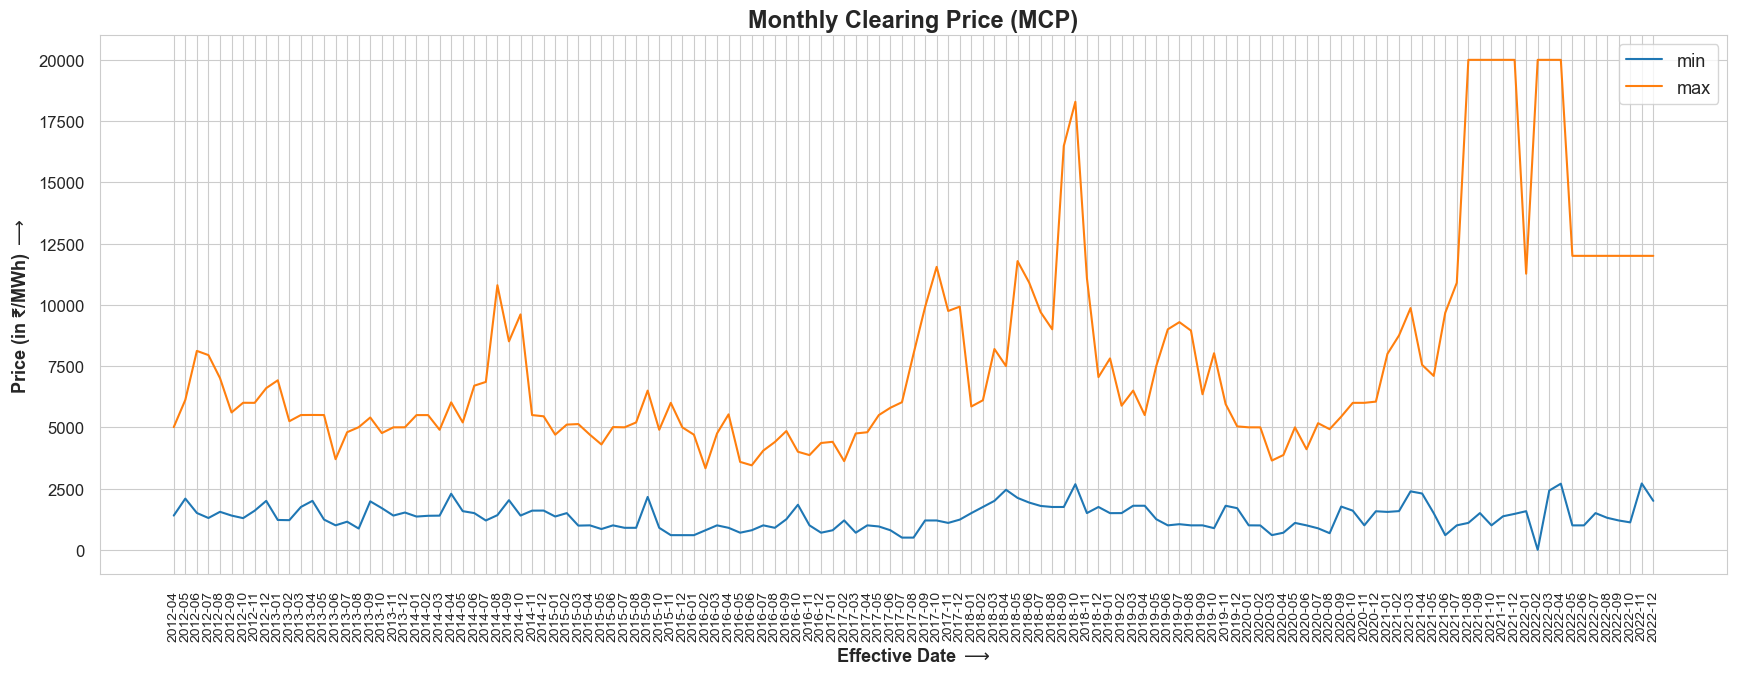

In [11]:
lineplot_1d(
    monthly_statistics_[[("MCP", "min"), ("MCP", "max")]].values,
    xticks = list(map(lambda dt : f"{dt[0]}-{str(dt[1]).zfill(2)}", monthly_statistics_.index.values)),
    legends = ["min", "max"],
    xlabel = "Effective Date $\longrightarrow$",
    ylabel = "Price (in ₹/MWh) $\longrightarrow$",
    title = "Monthly Clearing Price (MCP)"
)

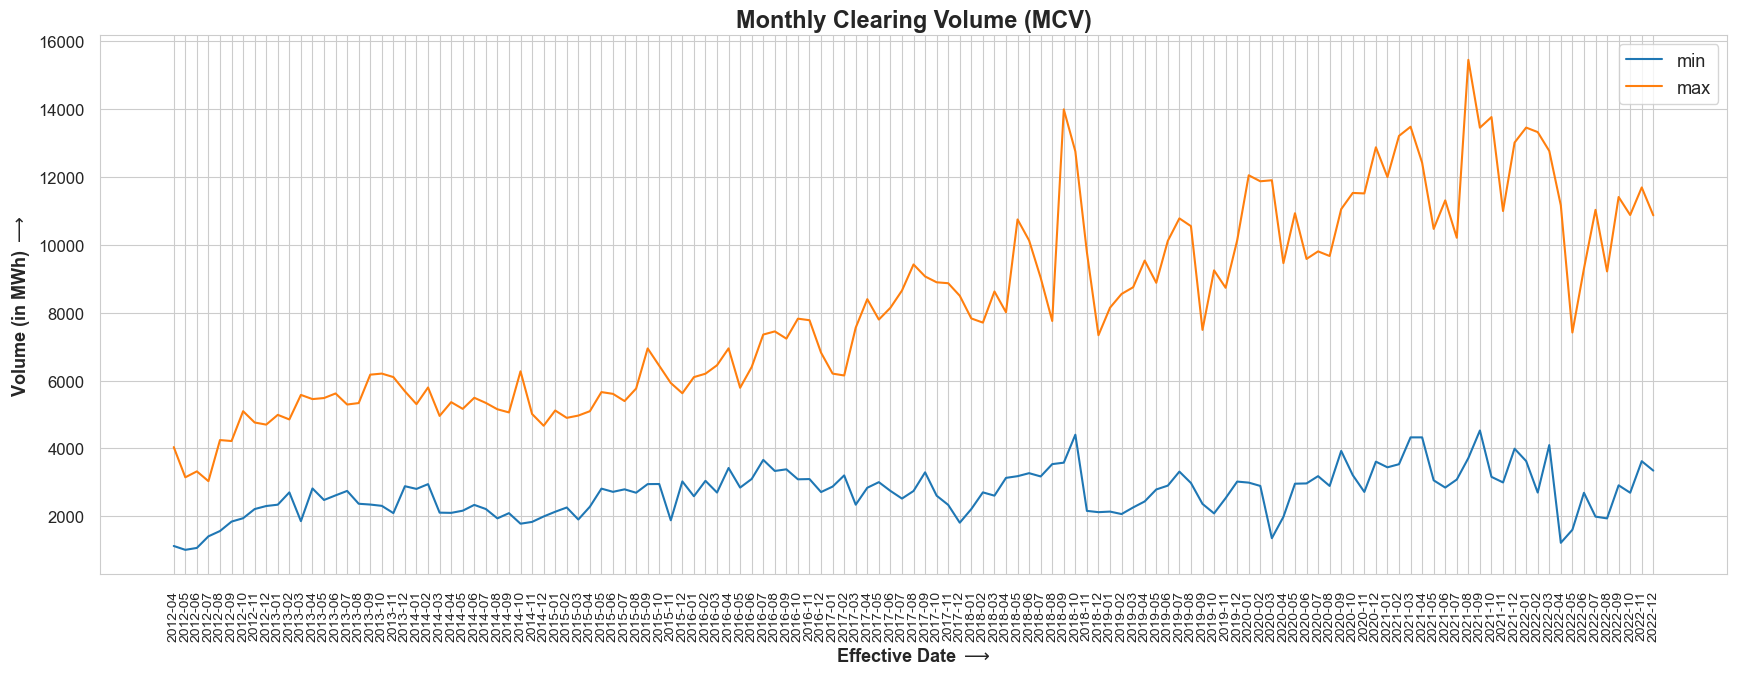

In [12]:
lineplot_1d(
    monthly_statistics_[[("MCV", "min"), ("MCV", "max")]].values,
    xticks = list(map(lambda dt : f"{dt[0]}-{str(dt[1]).zfill(2)}", monthly_statistics_.index.values)),
    legends = ["min", "max"],
    xlabel = "Effective Date $\longrightarrow$",
    ylabel = "Volume (in MWh) $\longrightarrow$",
    title = "Monthly Clearing Volume (MCV)"
)